# Regressão

As técnicas de aprendizado supervisionado abrange basicamente dois tipos de problema:
- Regressão:  Busca prever um valor continuo com base no conjunto de dados rotulados, assim deseja-se obter um valor numérico, ou seja, previsões numéricas. Exemplo: consumo de um carro tendo os dados de distância percorrida e velocidade.

- Classificação: Buscas se associar a variáveis de entradas em categorias distintas.

**Regressão:** Corresponde a uma equação matemática que descreve como duas ou mais variaveis estão relacionadas.
- variáveis independentes: Não precisão de outras variáveis para serem explicadas. O modelo dessas variaveis utilizam-se X.

- variáveis dependentes: Se deseja prever e precisam de outras variáveis para serem explicadas. O modelo dessas variaveis utilizam-se Y. Assim Y = F(X), ou seja, é uma função de X.



## Tipos de regressão
Os modelos de regressão são do tipo,
- **Regressão Simples:** Uma única variável independente é utilizada para obter a variável dependente.  

- **Regressão mmúltipla:** Várias variáveis independentes são utilizadas para obter a variável dependente. 

A relação desses tipos de regressão é dado por,
- **Liner:** Quando os parâmetros apresenta linearidade, ou seja, a equação matemática que representa a reta de regressão é uma função afim. Exemplo y = 10 + 5x
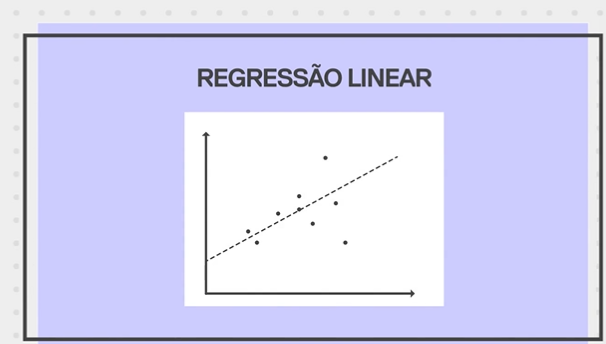

- **Não linear:**
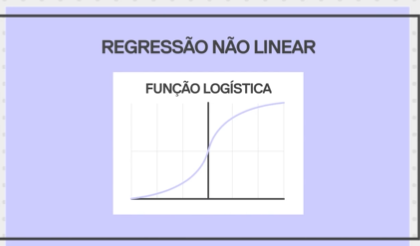 Função logística dada por Y = 1/(1 + EXP(-x)) é não linear.


Regressão lógistica usa a probablidade para prever.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

Os dados registrados serão colocados em arrade temperatura e o numero de sorvetes, já para organizar os dados será utilizado a classe do pandas *DataFrame* para criar uma tabela. Para criar um Data Frame é necessário passar um dicionáriocomo parâmetro, assim a chave 'temperatura' está associado a variável temperatura.

In [4]:
#Registros da temperatura
temperatura = np.array([30, 25, 36, 18, 25, 29, 30, 33, 37, 31, 26, 37, 29, 26, 30, 31, 34, 38])

In [5]:
#Registros de sorvetes
numero_sorvetes = pd.array([20, 12, 50, 10, 18, 25, 26, 32, 48, 22, 16, 52, 24, 20, 28, 29, 35, 40])

In [6]:
df = pd.DataFrame({'temperatura': temperatura, 'numero_sorvetes': numero_sorvetes})

In [7]:
df.head()

,temperatura,numero_sorvetes
0,30,20
1,25,12
2,36,50
3,18,10
4,25,18


## Gerando gráficos

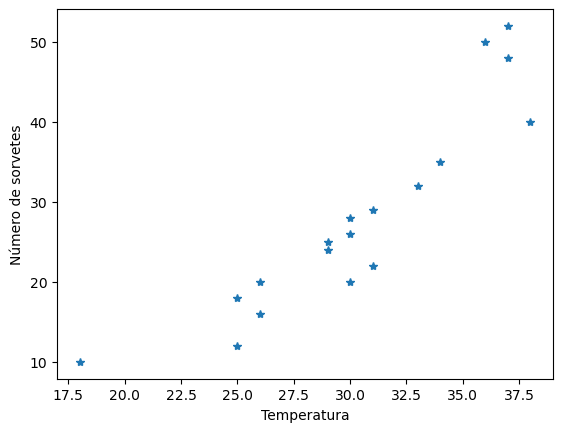

In [8]:
plt.plot(df['temperatura'],df['numero_sorvetes'],'*')
plt.xlabel('Temperatura')
plt.ylabel('Número de sorvetes')
plt.show()

## Separação de variaveis independentes  e dependentes
Inicialmente, é atribuido as váriaveis x e y os valores das variáveis. O método *to_numpy()* convertem os valores do data frame no tipo float.

In [9]:
x = df['temperatura'].to_numpy()
y = df['numero_sorvetes'].to_numpy()

Para criar o modelo é necessário dividir a base de dados entre dados de treino e em dados de teste, assim é definido 80% da base para treino e 20% para teste. Para isso,é usado a clase *train_test_split* da biblioteca *sklearn* que faz essa separação automaticamente.

In [10]:
from sklearn.model_selection import train_test_split

A função *trein_test_split* retorna a base de dados de treino e teste das variaveis x e y. Os dados retornados são divididos de forma aleatória entre treino e teste.

Os parâmetros do método *test_size = 0.n* é dado pela base de dados com suas variáveis e a porcentagem desejada para teste. Por padrão *test_size* é 25% de teste e 75% treino.


In [11]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

## Treinando o modelo

A variável modelo conterá o modelo de regressão criado, sendo necessário instanciar a variável usando o método *LinerarRegression()*. Para tanto é utilizado o método *fit* para realizar o treinamento. O método *reshape* serve para colocar os dados na forma de vetor com n linhas e uma coluna.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Define o modelo de regressão
modelo = LinearRegression()

#Treino o modelo com os dados da base
modelo.fit(x_treino.reshape(-1,1),y_treino.reshape(-1,1))

LinearRegression()

## Testando o modelo

Após o treinamento é possivel testar o modelo, para isso é usando o método *predict* 

In [14]:
y_previsto = modelo.predict(x_teste.reshape(-1,1))

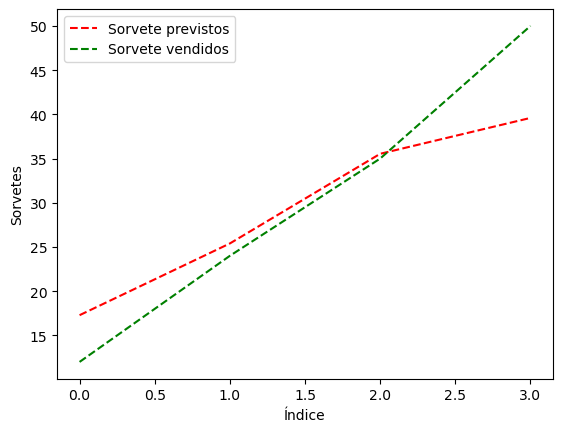

In [19]:
plt.plot(range(y_previsto.shape[0]), y_previsto, 'r--')
plt.plot(range(y_teste.shape[0]), y_teste, 'g--')
plt.legend(['Sorvete previstos','Sorvete vendidos'])
plt.xlabel('Índice')
plt.ylabel('Sorvetes')
plt.show()